In [1]:
# mnist datasets:cifar , fashion , handwritten recogniztion

In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [42]:
### mnist = tf.keras.datasets.fashion_mnist
mnist = tf.keras.datasets.mnist

In [43]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [44]:
len(xtrain)

60000

In [45]:
len(ytrain)

60000

In [46]:
len(xtest)

10000

In [47]:
len(ytest)

10000

In [48]:
xtrain = tf.keras.utils.normalize(xtrain)
xtest = tf.keras.utils.normalize(xtest)

In [50]:
xtrain[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [49]:
xtrain[12]# Row number 12 or 12th image with index number 11

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

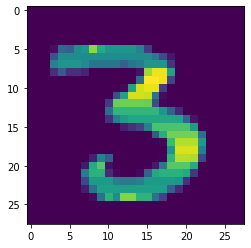

In [51]:
plt.imshow(xtrain[12])
plt.show()

In [52]:
ytrain[100]

5

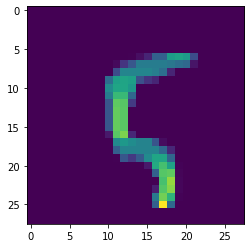

In [53]:
plt.imshow(xtrain[100])
plt.show()

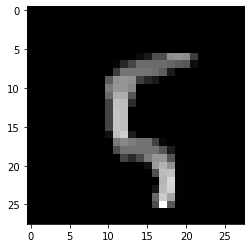

In [54]:
plt.imshow(xtrain[100],cmap='gray')
plt.show()

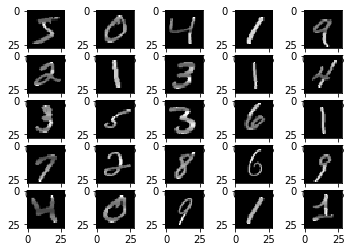

In [55]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(xtrain[i],cmap='gray')
plt.show()

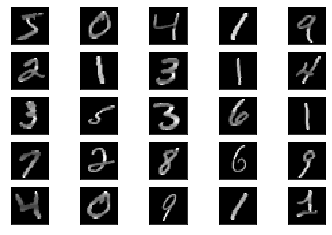

In [56]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xtrain[i],cmap='gray')
plt.show()

In [57]:
#### Build Model
model = tf.keras.models.Sequential()

In [58]:
### Adding the layers
model.add(tf.keras.layers.Flatten())   ### input layer
model.add(tf.keras.layers.Dense(784,activation='relu'))  ### hidden layer
model.add(tf.keras.layers.Dense(600,activation='relu'))  ### hidden layer
model.add(tf.keras.layers.Dense(64,activation='relu'))   ### hidden layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [61]:
#xtrain.shape[1] * xtrain.shape[2]
xtrain.shape[2]

28

In [62]:
### Configure the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [63]:
#### Train the model
## model.fit(xtrain,ytrain,epochs=3,batch_size=20)
model.fit(xtrain,ytrain,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.2037 - acc: 0.9371
Epoch 2/3
60000/60000 [==============================] - 58s 974us/sample - loss: 0.0898 - acc: 0.9726
Epoch 3/3
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0621 - acc: 0.9807


In [64]:
### predictions 
predictions = model.predict(xtest)

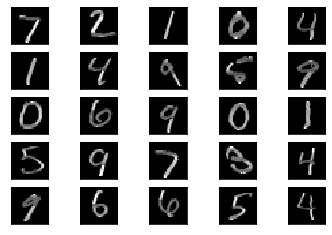

In [65]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xtest[i],cmap='gray')
plt.show()

In [66]:
ytest[10]

0

In [67]:
np.argmax(predictions[10])

0

In [68]:
np.argmax(predictions[20])

9

In [69]:
predictions[20]

array([4.8447669e-06, 2.4689311e-05, 4.7286171e-06, 4.4066252e-05,
       2.8721930e-04, 1.7806142e-05, 2.0361972e-07, 1.9661842e-02,
       6.9179063e-05, 9.7988540e-01], dtype=float32)

In [70]:
loss,accu = model.evaluate(xtest,ytest)
loss,accu

10000/10000 [==============================] - 2s 171us/sample - loss: 0.0870 - acc: 0.9744


(0.08696050668242387, 0.9744)